# Neural network : Regression

### Importing dependencies

In [1]:
# tensorflow is a machine learning framework
import tensorflow as tf

# To visualize data
import matplotlib.pyplot as plt

#To work with n-dimensional numericals
import numpy as np

# To work with data
import pandas as pd

#To Visualize the training of the model
from tqdm import tqdm 

%matplotlib inline

C:\ProgramData\Python\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Declaring the required data

In [2]:
# created a linearly spaced feature with a dim [1000000 x 1]
x_data = np.linspace(0,10,1000000)

# Noise is added just to make sure that all the points does not lie on a staright line, 
# in other words to make the points more dispersed
noise = np.random.randn(len(x_data))

# Calculating the true value of the target variable by using the slope equals 0.5 and intercept equals 5 with some noise
y_true = (0.5*x_data) + 5 + noise

### y = mx + b 
#### m = 0.5                            b = 5 

In [3]:
#Converting the faetures and target variable into a dataframe
x_df = pd.DataFrame(data=x_data, columns=['x Data'])
y_df = pd.DataFrame(data=y_true,columns=['y'])

my_data = pd.concat([x_df,y_df],axis =1)

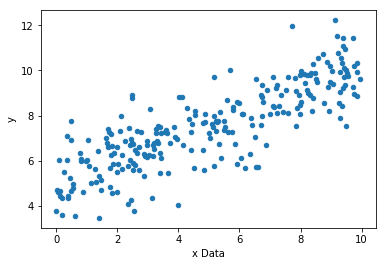

In [4]:
# Dataframe - visualization

# Since 1 million data points is computationally expensive to plot in a graph
# I randomly chose 250 samples from the dataframe to visualize it 
my_data.sample(n=250).plot(kind='scatter', x='x Data', y='y')

In [5]:
# And then using batches to 
batch_size = 10

In [6]:
# Declaring and initialising the tensorflow variables
rn = np.random.randn(2)

#randomly assigning values to the variables
m = tf.Variable(rn[0])
b = tf.Variable(rn[1])

In [7]:
# Declaring the required placeholders

xph = tf.placeholder(tf.float64,[batch_size])
yph = tf.placeholder(tf.float64,[batch_size])

In [8]:
# Predicted y value for the given slope and intercept
y_model = m*xph + b

In [9]:
# Calculating the necessary loss function, here we used sum of mean square to calculate the loss function
error = tf.reduce_sum(tf.square(yph-y_model))

In [10]:
# Declaring the optimizer - Gradient descent algorithm 
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

# To train the model, we need to minimize the cost/loss function inorder to minimize the error in the predicted value 
train = optimizer.minimize(error)

In [11]:
# Initializing the tensorflow variables, as it is a must to initialize all the tensorflow variables before starting the 
# session.
init = tf.global_variables_initializer()

In [12]:
# Initializing the session, i.e start to train the model

with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 10000
    
    for i in tqdm(range(batches), desc='Training Progress',leave=True):
        
        #randomly choosing a index position and fitting it into the training set
        # as the probability of 1 set repeating is 1/1000000 which is very low
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        
        feed = {xph:x_data[rand_ind], yph:y_true[rand_ind]}
        
        sess.run(train,feed_dict = feed)
    
    model_m, model_b = sess.run([m,b])

Training Progress: 100%|███████████████████████████████████████████████████████| 10000/10000 [00:03<00:00, 2760.50it/s]


In [13]:
# Predicting the line y=mx+b
y_hat = x_data*model_m + model_b

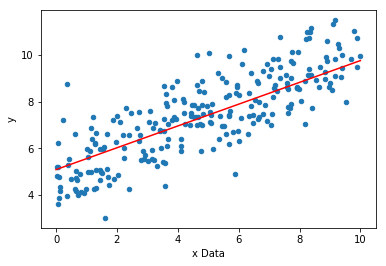

In [14]:
# Visualizing the results
my_data.sample(n=250).plot(kind='scatter',x='x Data',y='y')
plt.plot(x_data,y_hat,'r-')

In [15]:
#Checking the accuracy of the model
print('  True Slope= 0.5    Predicted Slope= ',model_m)
print('\nTrue Intercept= 5    Predicted Intercept= ',model_b)

  True Slope= 0.5    Predicted Slope=  0.4667404373235158

True Intercept= 5    Predicted Intercept=  5.085202336551883


# THE END